Flight Booking Price Prediction

The objective is to analyze the flight booking dataset obtained from a platform which is used to book flight tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers. Apply EDA, statistical methods and Machine learning algorithms in order to get meaningful information from it.

Dataset Information:

Flight booking price prediction dataset contains around 3 lacs records with 11 attributes

In [1]:
! pip install xgboost

In [2]:
#Importing all the Liabreries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import warnings
warnings.filterwarnings ("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor

In [3]:
file_name = "Flight_Booking.csv"
file_path = os.path.join(os.getcwd(), file_name)
 
Data = pd.read_csv(file_path)
print(Data.head())

   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955  


In [4]:
Data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
pd.set_option("display.max_columns",None)
pd.set_option("display.expand_frame_repr",False)
pd.set_option("Max_colwidth",None)

In [6]:
#Data Preprocessing
Data["Unnamed: 0"].unique() #By chekcing [Unnames:0] col from the data we find its index number so we will go and drop this column.

array([     0,      1,      2, ..., 300150, 300151, 300152],
      shape=(300153,))

In [7]:
Data=Data.drop(columns=['Unnamed: 0'])


In [8]:
#Flight Name was excluded since it is a unique categorical identifier and does not contribute useful predictive signal to the model.
Data= Data.drop(columns=["flight"],axis=1)

In [9]:
Data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [10]:
Data.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [11]:

"""Checking the shape of a dataframe and datatypes of 
all columns along with calculating the statistical 
data."""
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


Data Vizualization

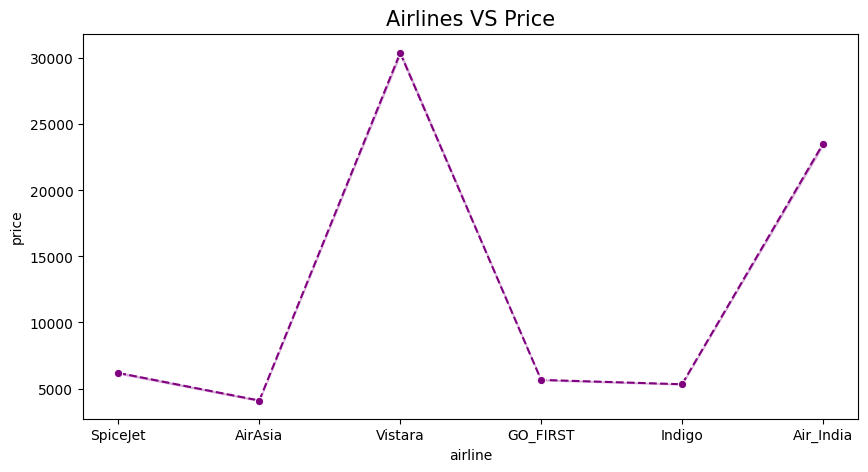

In [12]:
#variation in prices with different flights
plt.figure(figsize=(10,5))
sns.lineplot(x=Data["airline"], y=Data["price"], color="#800080", linestyle = '--',marker = "o")
plt.title("Airlines VS Price", fontsize=15)
plt.xlabel=("Airline")
plt.ylabel=("Price")        
plt.show()

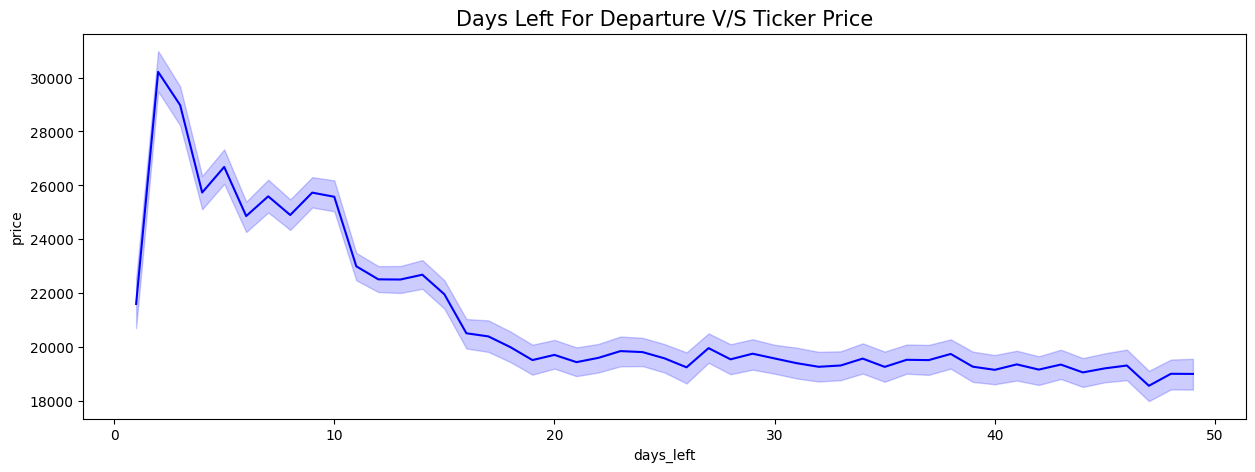

In [13]:
#The price of the ticket increase as the days left for departure decreases
plt.figure(figsize=(15,5))
sns.lineplot(data=Data,x="days_left", y="price", color="Blue")
plt.title("Days Left For Departure V/S Ticker Price", fontsize=15)
plt.Xlabel=("Dyas Left for the Departure")
plt.ylabel=("Price")
plt.show()



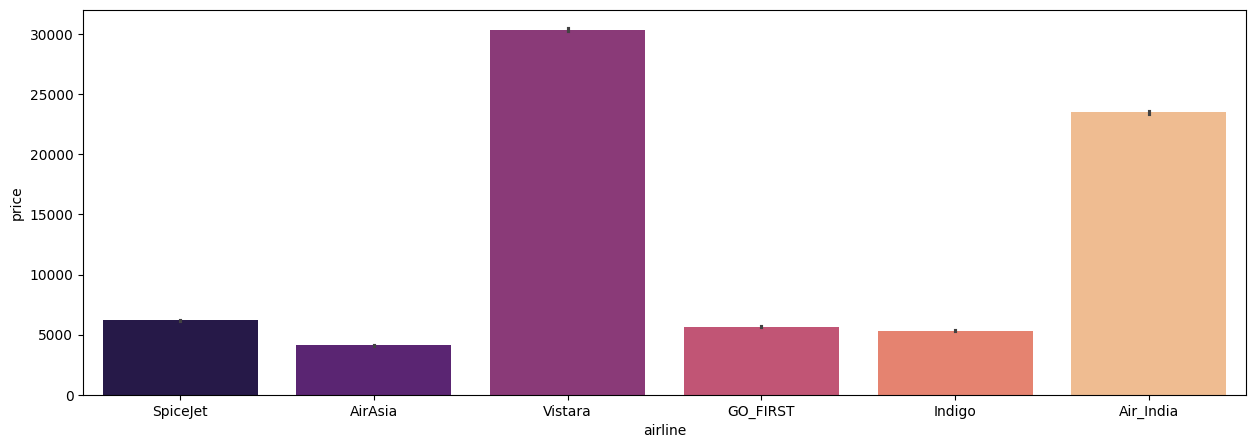

In [14]:
#Price range of all the flights
plt.figure(figsize=(15,5))
sns.barplot(data=Data,x='airline',y='price', palette='magma')
plt.show()

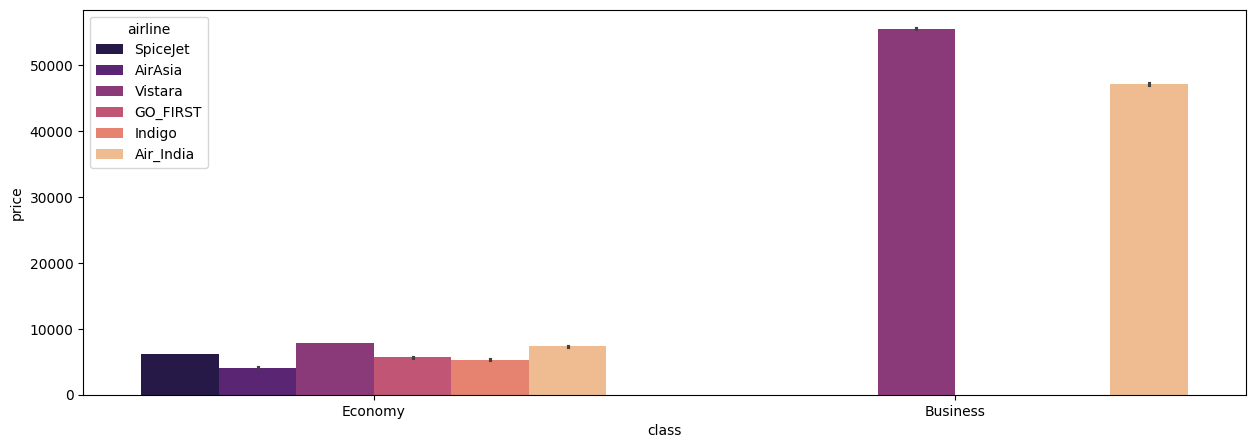

In [15]:
#Range of price all the flights of Economy and Bunsiness class
plt.figure(figsize=(15,5))
sns.barplot(x="class", y="price", data=Data, hue="airline", palette="magma")
plt.show()

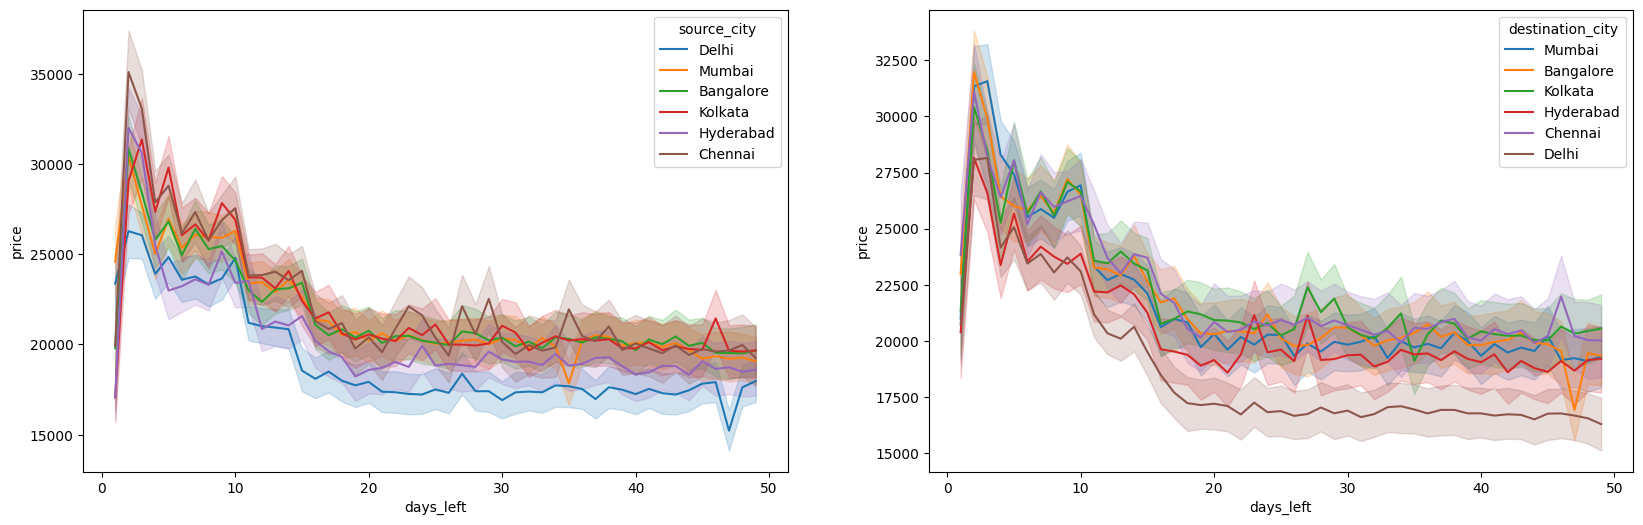

In [16]:
#Range of price of flight with source and destination city according to the days left
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x="days_left", y="price", data=Data, hue="source_city",ax=ax[0])
sns.lineplot(x='days_left',y="price", data=Data,hue='destination_city', ax=ax[1])
plt.show()

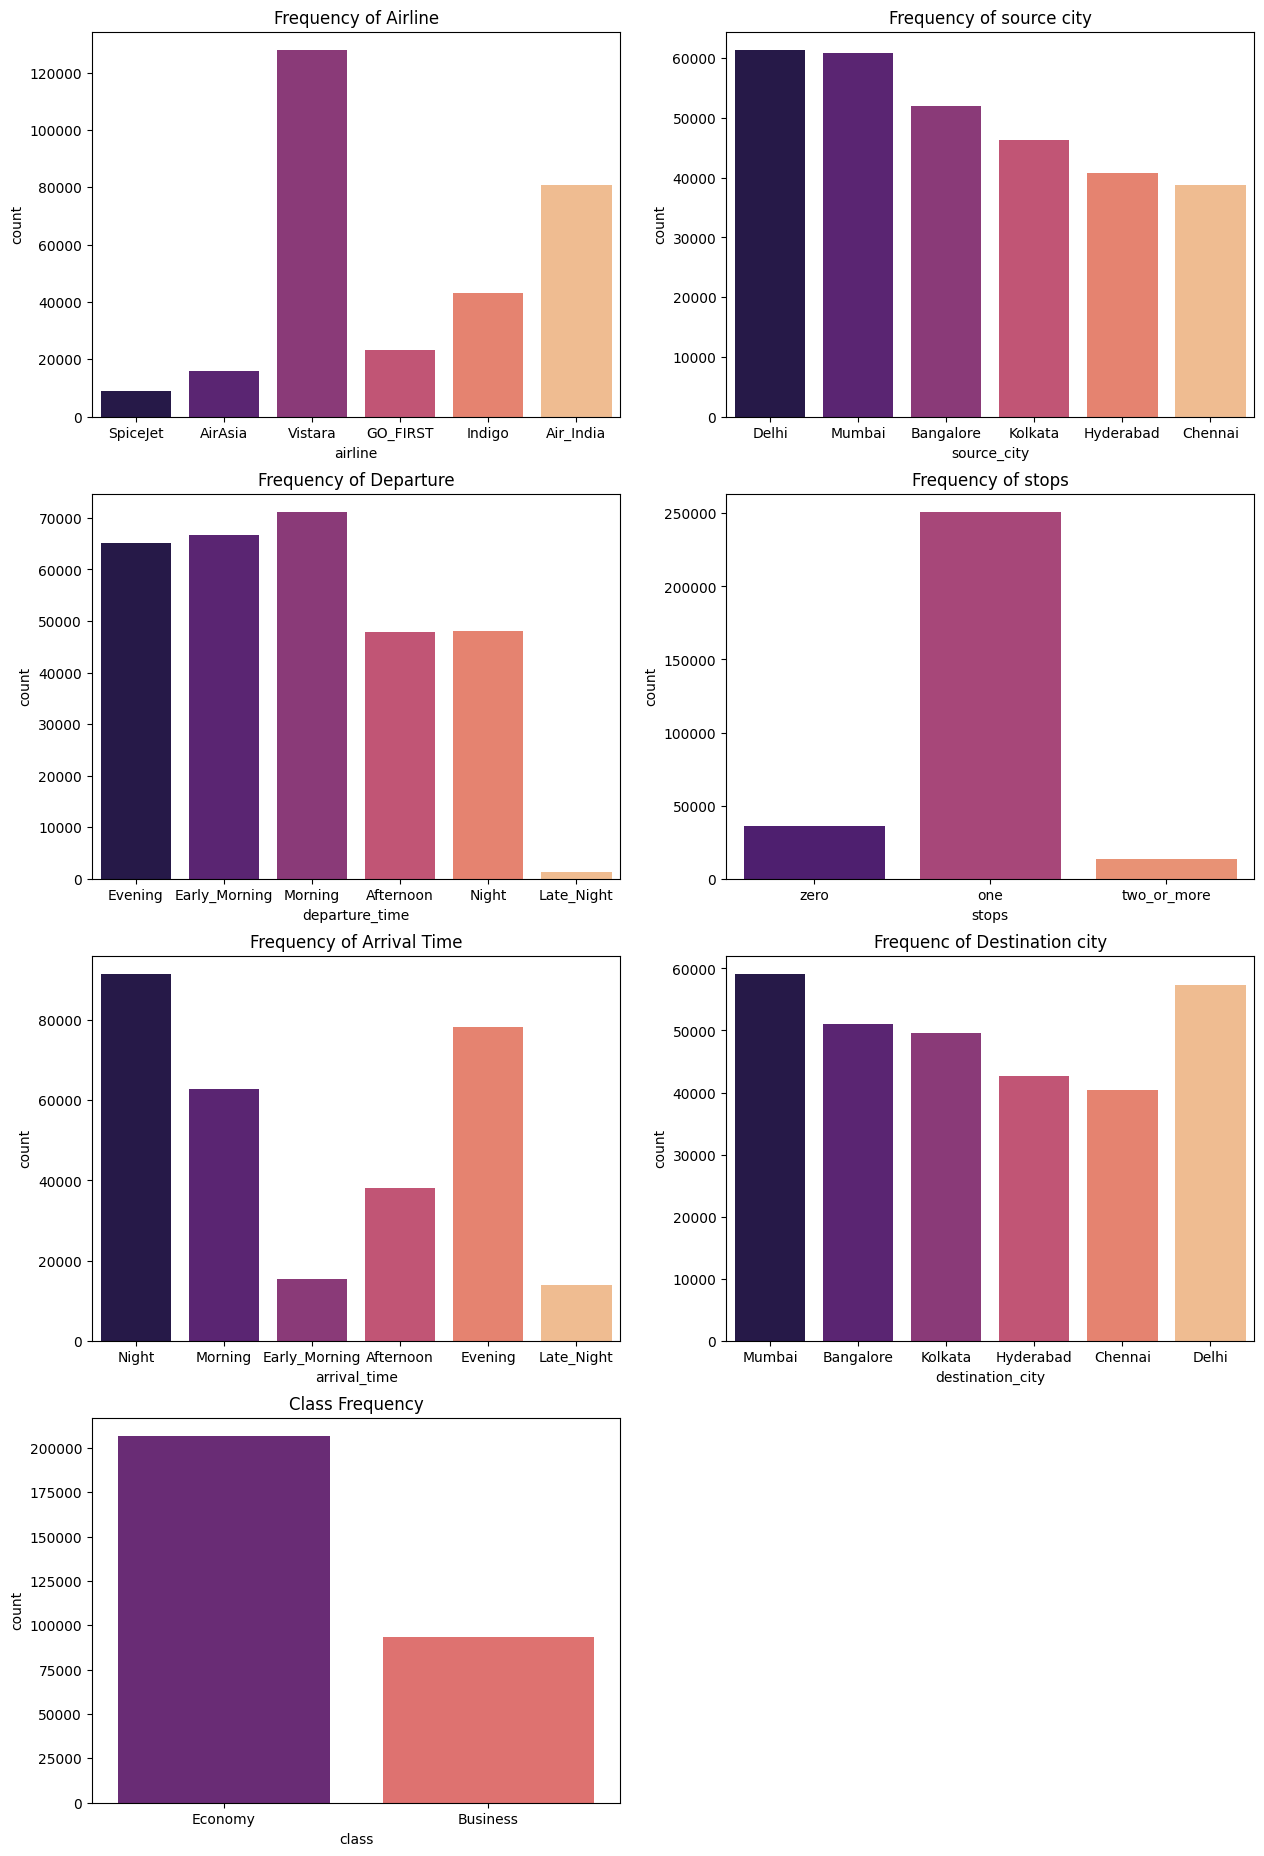

In [17]:
#Range of price of all the flights of Economy and Business class
plt.figure(figsize=(15,23))

plt.subplot(4,2,1)
sns.countplot(x=Data["airline"],data=Data, palette="magma")
plt.title("Frequency of Airline")

plt.subplot(4,2,2)
sns.countplot(x=Data["source_city"],data=Data, palette="magma")
plt.title("Frequency of source city")

plt.subplot(4,2,3)
sns.countplot(x=Data["departure_time"], data=Data, palette="magma")
plt.title("Frequency of Departure")

plt.subplot(4,2,4)
sns.countplot(x=Data["stops"], data=Data, palette="magma")
plt.title("Frequency of stops")

plt.subplot(4,2,5)
sns.countplot(x=Data["arrival_time"], data= Data, palette="magma")
plt.title("Frequency of Arrival Time")

plt.subplot(4,2,6)
sns.countplot(x=Data["destination_city"], data=Data, palette="magma")
plt.title("Frequenc of Destination city")

plt.subplot(4,2,7)
sns.countplot(x=Data["class"], data=Data, palette="magma")
plt.title("Class Frequency")

plt.show()

In [18]:
Data.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

In [19]:
#Performing Label Encoding for categorical features of a Dataframe

Le=LabelEncoder()

Catogorical_columns=['airline', 'source_city','departure_time','stops',
                     'arrival_time', 'destination_city', 'class']

for col in Catogorical_columns:
    Data[col]=Le.fit_transform(Data[col])

In [20]:
#Performing One hot encoding for categorical features of a dataframe
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Data["airline"]=le.fit_transform(Data["airline"])
Data["source"]=le.fit_transform(Data["source_city"])
Data["departure_time"]=le.fit_transform(Data["departure_time"])
Data["stops"]=le.fit_transform(Data["stops"])
Data["arrival_time"]=le.fit_transform(Data["arrival_time"])
Data["destination_city"]=le.fit_transform(Data["destination_city"])
Data["class"]=le.fit_transform(Data["class"])
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   source_city       300153 non-null  int64  
 2   departure_time    300153 non-null  int64  
 3   stops             300153 non-null  int64  
 4   arrival_time      300153 non-null  int64  
 5   destination_city  300153 non-null  int64  
 6   class             300153 non-null  int64  
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
 10  source            300153 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 25.2 MB


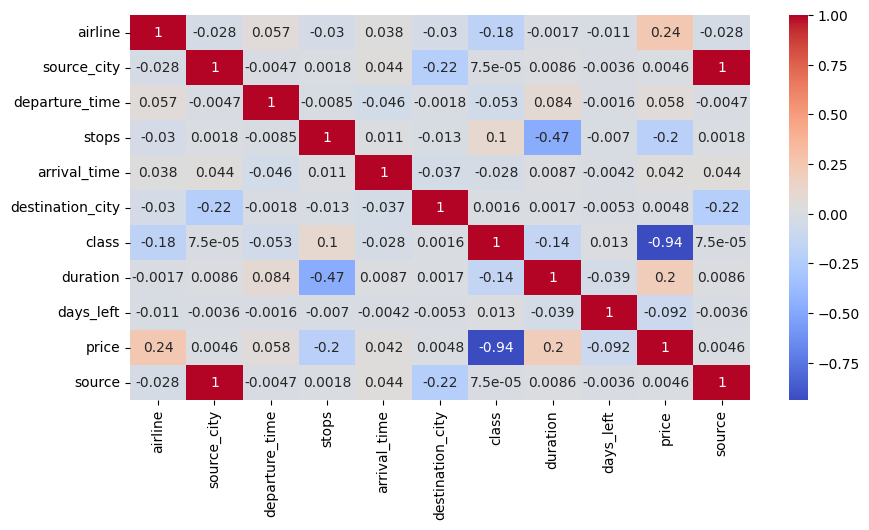

In [21]:
#Feature Selection
#Plotting the correlation graph to see the correlation between features and dependent variable.
plt.figure(figsize=(10,5))
sns.heatmap(Data.corr(), annot=True, cmap="coolwarm")
plt.show()

In [22]:
#Feature Selection
#Selecting the features using VIF. VIF should be less than 5. So drop the stops feature.
col_list=[]
for col in Data.columns:
    if((Data[col].dtype != 'object') & (col !='price')):
        col_list.append(col)

X= Data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i)
for i in range(len(X.columns))]
print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city       inf
2    departure_time  2.779421
3             stops  1.426591
4      arrival_time  3.684547
5  destination_city  2.885315
6             class  2.849367
7          duration  4.113876
8         days_left  3.976738
9            source       inf


In [23]:
#Feature selection
#Dropping the stops columns. All features are having VIF less than 5.
Data= Data.drop(columns=["stops"], axis=1)


In [24]:
col_list=[]
for col in Data.columns:
    if((Data[col].dtype !="object") & (col !='price')):
        col_list.append(col)

X = Data[col_list]
vif_Data = pd.DataFrame()
vif_Data["feature"] = X.columns
vif_Data["VIF"]  = [variance_inflation_factor(X.values,i)
                            for i in range(len(X.columns))]
print(vif_data)


            feature       VIF
0           airline  3.393124
1       source_city       inf
2    departure_time  2.779421
3             stops  1.426591
4      arrival_time  3.684547
5  destination_city  2.885315
6             class  2.849367
7          duration  4.113876
8         days_left  3.976738
9            source       inf


In [25]:
#Linear Regression
#Applying standarization and implementing Linear Regression Model to predict the price of a flight.
X= Data.drop(columns=["price"], axis=1)
y = Data["price"]

In [26]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test=train_test_split(X, y ,test_size=0.2, random_state=42)


In [27]:
#Applying standardization and implementing Linear Regression Model to predict the price of a flight

Scaler=StandardScaler()

X_train=Scaler.fit_transform(X_train)
X_test=Scaler.transform(X_test)


#Liner Regression 
Model_lr=LinearRegression()
Model_lr.fit(X_train, y_train)

y_pred_lr=Model_lr.predict(X_test)

Diffrences=pd.DataFrame(np.c_[y_test,y_pred_lr], columns=["Actual Calue", "Predicted Value"])
Diffrences.head()

,Actual Calue,Predicted Value
0,7366.0,4673.755319
1,64831.0,51713.744720
2,6195.0,6610.897658
3,60160.0,55489.844234
4,6578.0,5120.342596


In [28]:
 #Evaluate the Model

#R2_Score
lr_r2_score= r2_score(y_test, y_pred_lr)
print(f"R2 Score (Lr): {lr_r2_score:.4f}")

#mean_absolute_error
mean_absolute_error_lr=metrics.mean_absolute_error(y_test, y_pred_lr)
print(f"mean_absolute_error(lr):{mean_absolute_error_lr:.4f}")

#mean_Abslute_percentage_error
MAPE=mean_absolute_percentage_error(y_test, y_pred_lr)
print(f"mean_Absolute_percentage_error (lr): {MAPE:.4f}")

#mean_square_error
MSE=metrics.mean_squared_error(y_test, y_pred_lr)
print(f"Mean Squared Error (Lr): {MSE:.4f}")

#root_mean_squared_error
RMSE =np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
print(f"Root Mean Squared  Error (lr): {RMSE:.4f}")

R2 Score (Lr): 0.8978
mean_absolute_error(lr):4468.4267
mean_Absolute_percentage_error (lr): 0.3477
Mean Squared Error (Lr): 52706651.3333
Root Mean Squared  Error (lr): 7259.9347



Calculating r2 score,MAE, MAPE, MSE, RMSE. Root Mean square error(RMSE) of the Linear regression model is 7259.93 and Mean absolute percentage error(MAPE) is 34 percent. Lower the RMSE and MAPE better the model.

LINEAR REGRESSION

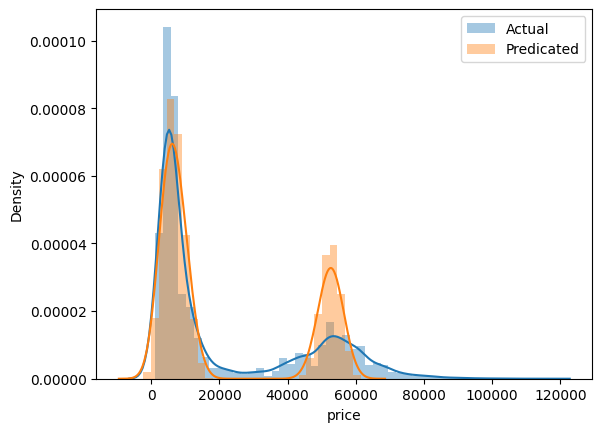

In [29]:

#Plotting the graph of actual and predicted price of flight using LinerRegression
sns.distplot(y_test, label="Actual")
sns.distplot(y_pred_lr,label="Predicated")
plt.legend()

In [30]:
#implementing RandomForest Regressor Model to predict the price of a flight

ModelRFR=RandomForestRegressor()

ModelRFR.fit(X_train, y_train)

y_pred_RFR =ModelRFR.predict(X_test)

#Evaluate the Model
#R2_SCORE

RFR_r2_score=r2_score(y_test, y_pred_RFR)
print(f"R2 Score (RFR): {RFR_r2_score:.4f}")

#mean_absolute_error
mean_absolute_error_RFR=metrics.mean_absolute_error(y_test, y_pred_RFR)
print(f"mean_absolute_error (RFR) : {mean_absolute_error_RFR:.4f}")

#mean_absolute_percentage_error
MAPE_RFR = mean_absolute_percentage_error(y_test, y_pred_RFR)
print(f"mean_absolute_percentage_error (RFR): {MAPE_RFR:.4f}")

#mean_squared_error
MSE_RFR=metrics.mean_squared_error(y_test, y_pred_RFR)
print(f"Mean Squared Error (RFR): {MSE_RFR:.4f}")

#root_mean_squared_error
RMSE_RFR=np.sqrt(metrics.mean_squared_error(y_test, y_pred_RFR))
print(f"Root Mean Squared Error (RFR): {RMSE_RFR:.4f}")


R2 Score (RFR): 0.9845
mean_absolute_error (RFR) : 1123.7176
mean_absolute_percentage_error (RFR): 0.0733
Mean Squared Error (RFR): 7984446.7724
Root Mean Squared Error (RFR): 2825.6763


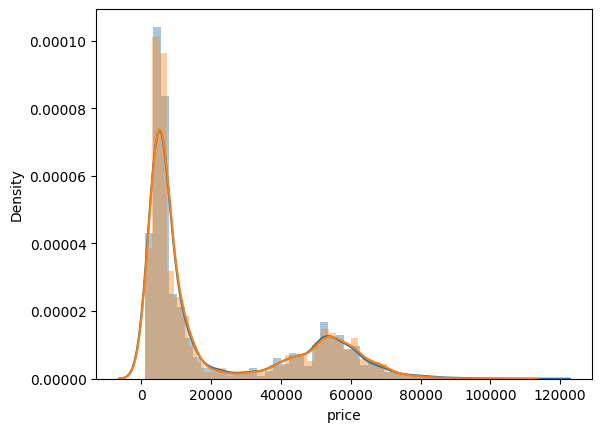

In [31]:

#Plotting the graph of actual and predicted price of flight using RandomForestRegressor

sns.distplot(y_test, label="Actual")
sns.distplot(y_pred_RFR, label="Predicted")
plt.show()

DECISION TREE REGRESSOR

In [32]:
# Implementing Decision Tree Regressor Model to predict the price of a flight
Model_DTR=DecisionTreeRegressor()
Model_DTR.fit(X_train, y_train)

y_pred_DTR=Model_DTR.predict(X_test)

In [33]:
#Evaluate the Decision Tree Regressor Model

#R2_score
DTR_r2_score = r2_score(y_test, y_pred_DTR)
print(f"R2 Score (DTC): {DTR_r2_score:.4f}")

#mean_absolute_error
mean_absolute_error_DTR=metrics.mean_absolute_error(y_test, y_pred_DTR)
print(F"mean_absolute_error (DTC) :{mean_absolute_error_DTR:.4f}")

#mean_absolute_percentage_error
MAPE_DTR= mean_absolute_percentage_error(y_test, y_pred_DTR)
print(f"mean_absolute_percentage_error (DTC): {MAPE_DTR:.4f}")

#mean_squared_error
MSE_DTR=metrics.mean_squared_error(y_test, y_pred_DTR)
print(F"Mean Squared Error (DTC): {MSE_DTR:.4f}")

#root_mean_squared_error
RMSE_DTR=np.sqrt(metrics.mean_squared_error(y_test, y_pred_DTR))
print(f"Root Mean Squared Error (DTC): {RMSE_DTR:.4f}")

R2 Score (DTC): 0.9746
mean_absolute_error (DTC) :1218.1072
mean_absolute_percentage_error (DTC): 0.0773
Mean Squared Error (DTC): 13090632.8300
Root Mean Squared Error (DTC): 3618.0980


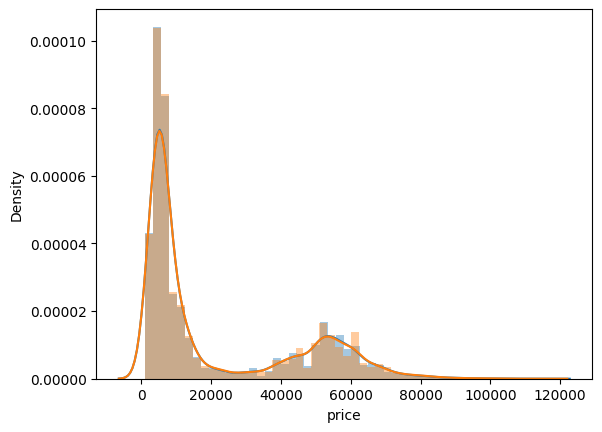

In [34]:
#Plotting the graph of actual and predicted price of flight using decisiontraaregressor

sns.distplot(y_test, label='Actual')
sns.distplot(y_pred_DTR, label="Predicted")
plt.show()


In [35]:
#Implementing XGBOOST Regressor Model to predict the price of a flight
Model_XGBR=XGBRegressor(n_estimators=300,learning_rate=0.05,max_deapth=6,subsample=0.8,random_state=42)
Model_XGBR.fit(X_train, y_train)
y_pred_XGBR=Model_XGBR.predict(X_test)



In [36]:
#Evaluate the XG Boost Regressor Model
#r2 Score
XGBR_R2_score=r2_score(y_test, y_pred_XGBR)
print(f"R2 Score (XGBR): {XGBR_R2_score:.4f}")

#mean_absolute_error
mean_absolute_error_XGBR=metrics.mean_absolute_error(y_test, y_pred_XGBR)
print(f"mean_absolute_error (XGBR) :{mean_absolute_error_XGBR:.4F}")

#mean_absolute_percentage_error
MAPE_XGBR=mean_absolute_percentage_error(y_test, y_pred_XGBR)
print(f"mean_absolute_percentage_error (XGBR): {MAPE_XGBR:.4f}")

#mean_squared_error
MSE_XGBR=metrics.mean_squared_error(y_test, y_pred_XGBR)
print(f"Mean Squared Error (XGBR): {MSE_XGBR:.4f}")

#root_mean_squared_error
RMSE_XGBR=np.sqrt(metrics.mean_squared_error(y_test, y_pred_XGBR))
print(f"Root Mean Squared Error (XGBR): {RMSE_XGBR:.4f}")

R2 Score (XGBR): 0.9693
mean_absolute_error (XGBR) :2289.5979
mean_absolute_percentage_error (XGBR): 0.1610
Mean Squared Error (XGBR): 15814445.0000
Root Mean Squared Error (XGBR): 3976.7380


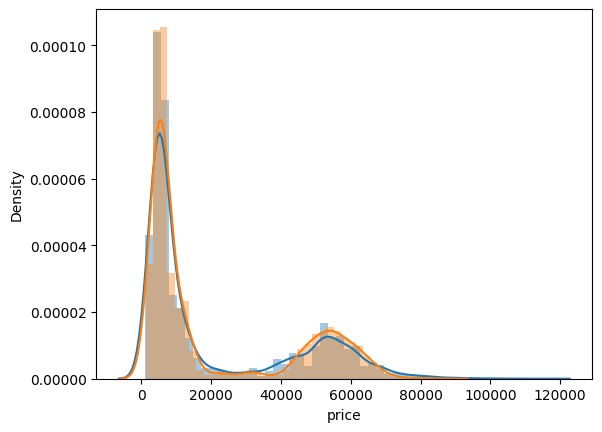

In [37]:
#plotting the graph of actual and predicted price of flight using XGBoost Regressor
sns.distplot(y_test, label="Actual")
sns.distplot(y_pred_XGBR, label="Predicted")
plt.show()

In [38]:
# Create your model metrics (replace with your actual metrics if you have cross-validation means)


model_names = ['Linear Regression', 'RandomForest Regressor', 'Decision Tree Regressor', 'XB Boost Regressor ']
r2_score=[lr_r2_score, RFR_r2_score, DTR_r2_score, XGBR_R2_score]
mean_absolute_error=[mean_absolute_error_lr, mean_absolute_error_RFR, mean_absolute_error_DTR, mean_absolute_error_XGBR]
MAPE=[MAPE, MAPE_RFR, MAPE_DTR, MAPE_XGBR]
Mean_Squared_Error=[MSE, MSE_RFR, MSE_DTR, MSE_XGBR]
Root_Mean_Squared_Error=[RMSE, RMSE_RFR, RMSE_DTR, RMSE_XGBR]


#Build comparision DataFrame
compare = pd.DataFrame({
    'Model': model_names,
    'r2_Score': [round(score, 3) for score in r2_score], # round to 3 decimals
    "mean_absolute_error": mean_absolute_error,
    "mean_absolute_percentage_error": MAPE,
    "Mean Squared Error" : Mean_Squared_Error,
    "Root Mean Squared Error" : Root_Mean_Squared_Error}).sort_values(by='r2_Score', ascending=False)
compare



,Model,r2_Score,mean_absolute_error,mean_absolute_percentage_error,Mean Squared Error,Root Mean Squared Error
1,RandomForest Regressor,0.985,1123.717574,0.073293,7.984447e+06,2825.676339
2,Decision Tree Regressor,0.975,1218.107184,0.077278,1.309063e+07,3618.097957
3,XB Boost Regressor,0.969,2289.597900,0.160983,1.581444e+07,3976.737985
0,Linear Regression,0.898,4468.426674,0.347658,5.270665e+07,7259.934665
